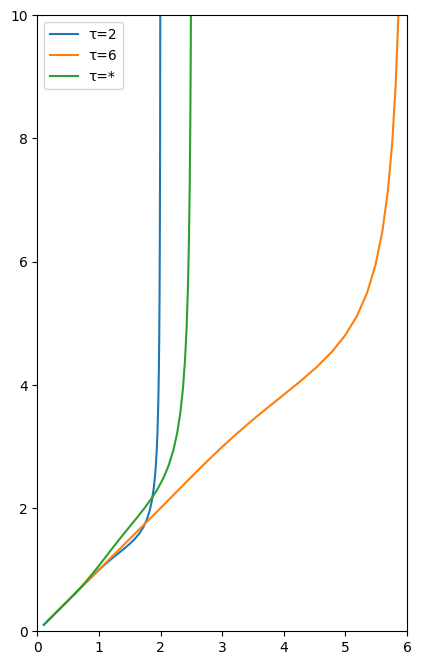

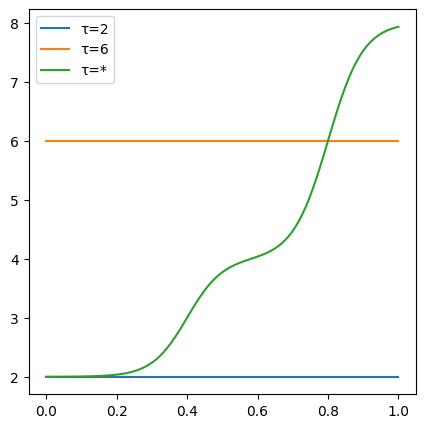

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

freq_list=np.logspace(-3,3,100)


#needs an array of frequency

def give_z_for_arbitary_tau(tau,freq_list,ax,name):
    
    def fun(x,y,lmd):
        return np.vstack((y[2]*tau(x),y[3]*tau(x),-lmd*y[1],lmd*y[0]))

    def bc(ya,yb):
        return np.array([ya[0]-1,yb[2],yb[3],ya[1]])

    Q=6.61e-4
    Rref=194.56

    x=np.linspace(0,1,1000)
    y=np.zeros((4,x.size))

    Z_list=np.zeros((np.size(freq_list),1),dtype=complex)
    ii=0
    for f in freq_list:
        w=2*np.pi*f
        lmd2=w*Q*Rref
        sol1 = solve_bvp(lambda x,y: fun(x,y,lmd=lmd2), bc, x, y)
        y3=sol1.sol(x)[2]
        y4=sol1.sol(x)[3]
        Z=2/(-(1/(Rref))*(y3[0]+y4[0]*1j)) 
        Z_list[ii]=Z
        ii=ii+1

    Z_list_real=np.real(Z_list)
    Z_list_imag=np.imag(Z_list)

    ax.plot(Z_list_real/(Rref/1.5),-Z_list_imag/(Rref/1.5),label=name)
    ax.set_aspect("equal")
    ax.set_xlim([0,6])
    ax.set_ylim([0,10])
    
    return Z_list

def tau_plotter(tau,ax,name):
    x=np.linspace(0,1,100)
    ax.plot(x,tau(x),label=name)

fig, ax=plt.subplots()
fig.set_size_inches(8,8)

fig2, ax2=plt.subplots()
fig2.set_size_inches(5,5)
# give_z_for_arbitary_tau(tau,freq_list,ax)
# give_z_for_arbitary_tau(tau1,freq_list,ax)
# give_z_for_arbitary_tau(tau2,freq_list,ax)
# def tau(x):
#     return 1+np.sqrt(x)
# give_z_for_arbitary_tau(tau,freq_list,ax,"1+sqrt(x)")
# tau_plotter(tau,ax2,"1+sqrt(x)")

# def tau1(x):
#     return 2-x
# give_z_for_arbitary_tau(tau1,freq_list,ax,"τ=2-x")
# tau_plotter(tau1,ax2,"τ=2-x")

# def tau2(x):
#     return 1+1/(1+np.sqrt(x))
# give_z_for_arbitary_tau(tau2,freq_list,ax,"1+1/(1+sqrt(x))")
# tau_plotter(tau2,ax2,"1+1/(1+sqrt(x))")

# def tau3(x):
#     return 1+np.sin(2*x)
# give_z_for_arbitary_tau(tau3,freq_list,ax,"τ=1+sin(2x)")
# tau_plotter(tau3,ax2,"τ=1+sin(2x)")

# def tau4(x):
#     return 1+np.tan(x)
# give_z_for_arbitary_tau(tau4,freq_list,ax,"τ=1+tan(x)")
# tau_plotter(tau4,ax2,"τ=1+tan(x)")

# def tau5(x):
#     return 1+x
# give_z_for_arbitary_tau(tau5,freq_list,ax,"τ=1+x")
# tau_plotter(tau5,ax2,"τ=1+x")

# def tau6(x):
#     return 1/((1/2)+(1/4-1/2)*x)
# give_z_for_arbitary_tau(tau6,freq_list,ax,"1/(1/2+(1/4-1/2)x)")
# tau_plotter(tau6,ax2,"1/(1/2+(1/4-1/2)x)")

def tau7(x):
    return 1+x**0
give_z_for_arbitary_tau(tau7,freq_list,ax,"τ=2")
tau_plotter(tau7,ax2,"τ=2")

def tau8(x):
    return 5+x**0
give_z_for_arbitary_tau(tau8,freq_list,ax,"τ=6")
tau_plotter(tau8,ax2,"τ=6")

def tau9(x):
    return 5+np.tanh(x*10-4)+2*np.tanh(x*10-8)
z_tanh=give_z_for_arbitary_tau(tau9,freq_list,ax,"τ=*")
tau_plotter(tau9,ax2,"τ=*")

# def tau9(x):
#     return 1+x
# give_z_for_arbitary_tau(tau9,freq_list,ax,"τ=1+x")
# tau_plotter(tau9,ax2,"τ=1+x")

ax.legend()
ax2.legend()

import csv

# open the file in the write mode
with open('./zdata2.csv', 'w') as f:
    # create the csv writer
    for fq1,z in zip(freq_list,z_tanh):
        row=[fq1,float(np.real(z)),float(np.imag(z))]
        # write a row to the csv file
        writer = csv.writer(f)
        writer.writerow(row)

## we dont know, what frequency is the impedance data generated for, hence the confusion in giving the frequency while writing to the CSV file
## wtf one line gap is coming while writing to the csv file

In [1]:
with open('./sample.csv','w') as f:
    writer =csv.writer(f)
    writer.writerow([7+2j])
    writer.writerow([2+3j])

NameError: name 'csv' is not defined

In [121]:
with open('./sample.csv','r') as f:
    reader = csv.reader(f)
    for row2 in reader:
        #row2=row2.apply(str).str.replace('\(|\)','')
        print(row2[0])
        #print(type(row2))

(7+2j)


IndexError: list index out of range

In [111]:
lst=["hello","1+1j"]
print(type(lst[1]))
print(lst[1])

<class 'str'>
1+1j


In [64]:
print(z_tanh)
#print(type(z_tanh))

[[325.99065529-4.81558137e+05j]
 [325.99064969-4.18834728e+05j]
 [325.99064199-3.64281107e+05j]
 [325.99063179-3.16833154e+05j]
 [325.99061761-2.75565347e+05j]
 [325.99059948-2.39672717e+05j]
 [325.99057531-2.08455143e+05j]
 [325.99054322-1.81303694e+05j]
 [325.99050086-1.57688755e+05j]
 [325.99044498-1.37149693e+05j]
 [325.99037104-1.19285872e+05j]
 [325.99027334-1.03748841e+05j]
 [325.99014422-9.02355344e+04j]
 [325.98997348-7.84823623e+04j]
 [325.98974779-6.82600669e+04j]
 [325.98944944-5.93692524e+04j]
 [325.98905504-5.16364943e+04j]
 [325.98853366-4.49109576e+04j]
 [325.98784444-3.90614539e+04j]
 [325.98693334-3.39738829e+04j]
 [325.98572892-2.95490063e+04j]
 [325.98413677-2.57005126e+04j]
 [325.98203209-2.23533331e+04j]
 [325.97924988-1.94421776e+04j]
 [325.9755721 -1.69102612e+04j]
 [325.97071048-1.47081963e+04j]
 [325.96428408-1.27930294e+04j]
 [325.95578939-1.11274033e+04j]
 [325.94456102-9.67882816e+03j]
 [325.9297197 -8.41904815e+03j]
 [325.91010374-7.32348990e+03j]
 [325.88

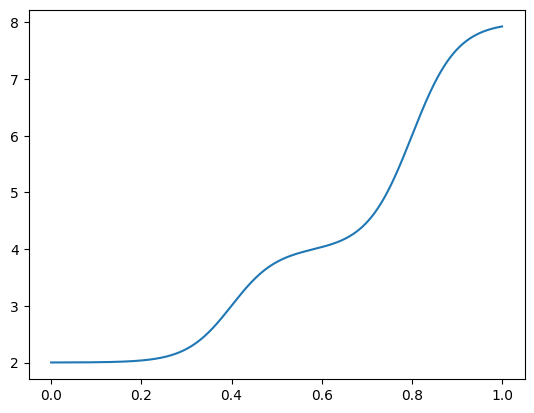

In [32]:
xx=np.linspace(0,1,1000)
plt.plot(xx,5+np.tanh(xx*10-4)+2*np.tanh(xx*10-8))
#plt.plot(xx,2+np.tanh(xx))
#R=l/(keff*A)